#Daffa Rizki Rizaly - 2301931251
GMM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_spd_matrix
from scipy.stats import multivariate_normal

In [2]:
df = pd.read_csv('UAS_ML2021_DATASET02.csv')
df

,Atribut_01,Atribut_02
0,67.062924,176.086355
1,68.804094,178.388669
2,60.930863,170.284496
3,59.733843,168.691992
4,65.431230,173.763679
...,...,...
495,59.976983,169.679741
496,66.423814,174.625574
497,53.604698,161.919208
498,50.433644,160.794875


In [3]:
X = df.values

#K(N_components=4)

In [4]:
gmm = GaussianMixture(n_components=4)
gmm.fit(df)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=4, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [5]:
#predictions from gmm
label4 =gmm.predict(df)

In [6]:
print(f'Silhouette Score(k=1): {silhouette_score(df, label4)}')

Silhouette Score(k=1): 0.6231397105934586


#K(N_components=3)

In [7]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3)
gmm.fit(df)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [8]:
#predictions from gmm
label3=gmm.predict(df)

In [9]:
print(f'Silhouette Score(k=3): {silhouette_score(df, label3)}')

Silhouette Score(k=3): 0.7309359929227115


#K(N_components=2)

In [10]:
gmm = GaussianMixture(n_components=2)
gmm.fit(df)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=2, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [11]:
#predictions from gmm
label2=gmm.predict(df)

In [12]:
print(f'Silhouette Score(k=2): {silhouette_score(df, label2)}')

Silhouette Score(k=2): 0.6604151717206548


Terlihat dari silhoutte score diatas k yang paling optimal adalah k=3.

#initialize weight and means

In [13]:
k=3

means = np.random.choice(X.flatten(), (k,X.shape[1]))
print(means)

[[ 58.33746129  63.02658071]
 [177.11158493  61.15835514]
 [162.99110965 177.72608496]]


In [15]:
weights = np.ones((k)) / k
print(weights)

[0.33333333 0.33333333 0.33333333]


In [16]:
cov = []
for i in range(k):
  cov.append(make_spd_matrix(X.shape[1]))
cov = np.array(cov)
print(cov.shape)

(3, 2, 2)


In [17]:
# Create a grid for visualization purposes 
x = np.linspace(np.min(X[...,0])-1,np.max(X[...,0])+1,100)
y = np.linspace(np.min(X[...,1])-1,np.max(X[...,1])+1,80)
X_,Y_ = np.meshgrid(x,y)
pos = np.array([X_.flatten(),Y_.flatten()]).T

In [18]:
colors = ['tab:blue', 'tab:orange', 'tab:green', 'magenta', 'yellow', 'red', 'brown', 'grey']
eps=1e-8

#GMM EM ALGORITHM

LinAlgError: ignored

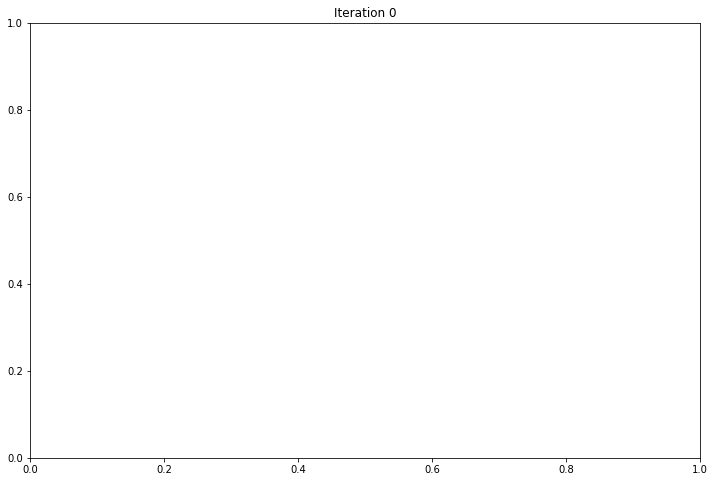

In [21]:
# run GMM for 40 steps
for step in range(40):

  # visualize the learned clusters
  if step % 1 == 0:
    plt.figure(figsize=(12,int(8)))
    plt.title("Iteration {}".format(step))
    axes = plt.gca()
    
    likelihood = []
    for j in range(k):
      likelihood.append(multivariate_normal.pdf(x=pos, mean=means[j], cov=cov[j]))
    likelihood = np.array(likelihood)
    predictions = np.argmax(likelihood, axis=0)
    
    for c in range(k):
      pred_ids = np.where(predictions == c)
      plt.scatter(pos[pred_ids[0],0], pos[pred_ids[0],1], color=colors[c], alpha=0.2, edgecolors='none', marker='s')
    
    plt.scatter(X[...,0], X[...,1], facecolors='none', edgecolors='grey')
    
    for j in range(k):
      plt.scatter(means[j][0], means[j][1], color=colors[j])

    #plt.savefig("img_{0:02d}".format(step), bbox_inches='tight')
    plt.show()

  likelihood = []
  # Expectation step
  for j in range(k):
    likelihood.append(multivariate_normal.pdf(x=X, mean=means[j], cov=cov[j]))
  likelihood = np.array(likelihood)
  assert likelihood.shape == (k, len(X))
    
  b = []
  # Maximization step 
  for j in range(k):
    b.append((likelihood[j] * weights[j]) / (np.sum([likelihood[i] * weights[i] for i in range(k)], axis=0)+eps))

    # update mean and variance
    means[j] = np.sum(b[j].reshape(len(X),1) * X, axis=0) / (np.sum(b[j]+eps))
    cov[j] = np.dot((b[j].reshape(len(X),1) * (X - means[j])).T, (X - means[j])) / (np.sum(b[j])+eps)

    # update the weights
    weights[j] = np.mean(b[j])
    
    assert cov.shape == (k, X.shape[1], X.shape[1])
    assert means.shape == (k, X.shape[1])